# Reads a single float and calculates nitrate uptake

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import glob
import seawater as sw
from soccom_functions import *
import pickle 
import datetime

## Reads float data

In [2]:
#reads float data
#FromBieto/float_data/9099SOOCN_HRQC.nc

file_folder = "../../data/raw/"
#file_folder = "../../data/raw/LowRes"
float_number = "9094"

files = sorted(glob.glob(file_folder+"/*"+float_number+"*.nc"))
print(files)

['../../data/raw\\9094SOOCN_HRQC.nc']


In [3]:
#help(sorted)
#help(glob)
#help(grids_one_buoy)
#help(pygamma)

In [4]:
#uses the function that reads and grids the data
FLOAT = grids_one_buoy(files[0], display_info = False, DO_ml_crit = 2.5, clear_short = True)

C:\Users\Clara Douglas\OneDrive - University of Southampton\PhD\Projects\net_community_production\notebooks\FromBieto\soccom_functions.py:330: RuntimeWarning: Mean of empty slice
  self.gr["LT"][j,i] = np.nanmean(disp[jj]**2)**0.5


In [52]:
#print(FLOAT.gr["Temperature"])
verbose="False"
clear_short="False"
nt = FLOAT.raw["Temperature"].shape[1] # shape[1]= tot # of profiles
#print(nt)
ding=1
#print(ding)
for i in range(ding): #nt
    #if verbose:
        #print("Float %s, profile: %d"%(FLOAT.raw["code"],i+1))
    #Interpolates temperature
    ii = np.argsort(FLOAT.raw["depth"][:,i]) # all rows, column i
    print(ii)
    print(FLOAT.raw["depth"][:,i])
    print(FLOAT.raw["Temperature"][:,i])
    
    
    z0 = FLOAT.raw["depth"][ii,i]
    #print(z0)
    #deletes profiles shorter than 950 m
    if clear_short and max(z0)<950:
        continue # if chosen to delete short profiles, then loop goes back up to start without loading data into grid, as below
    p0 = FLOAT.raw["Pressure"][ii,i]
    print(p0)
    T0 = FLOAT.raw["Temperature"][ii,i]
    print(T0.mask)
    print(z0.mask)
    msk = ~((T0.mask) | (z0.mask))
    print(msk)

    #    FLOAT.gr["Temperature"][:,i] = grids_interpolates(z0[msk], T0[msk], FLOAT.gr["depth"], dz, grid = gridding)


[547 543 539 536 532 528 524 521 518 514 510 505 501 496 491 486 480 474
 468 463 457 450 444 438 432 426 420 414 408 402 396 390 384 378 372 366
 361 355 348 342 336 330 319 308 282 256 230 204 178 152 126 100  74  48
  22   6   5   4   3   2   1   0 374 365 364 394 395 363 362 397 398 399
 360 359 400 358 357 401 393 392 391 389 376 377 379 373 380 382 371 375
 370 383 385 386 387 368 367 388 369 381 341 354 316 315 314 313 312 311
 310 309 307 306 305 304 303 302 301 300 299 298 297 296 295 294 293 292
 291 290 289 317 318 320 321 353 352 351 350 349 347 346 345 344 343 403
 340 339 356 338 335 334 333 332 331 329 328 327 326 325 324 323 322 337
 404 424 406 515 513 512 511 509 508 507 506 504 503 502 500 499 498 497
 495 494 493 492 490 489 488 487 485 484 483 482 516 481 517 520 555 554
 553 552 551 550 549 548 546 545 544 542 541 540 538 537 535 534 533 531
 530 529 527 526 525 523 522 519 405 479 477 439 437 436 435 434 433 431
 430 429 428 427 425 288 423 422 421 419 418 417 41

In [7]:
#the gridded data is located in the dictionary FLOAT.gr, and contains the following variables
print(FLOAT.gr.keys()) ## keys lists the dict names in the gr object
#some of them are standard and others related to thorpe scales and mixing, and you also have geopotential anomalies (gpa) integrated between 500 and 1500 m (gpa_500_1500)

print("This float is WMO code: %s"%(FLOAT.gr["WMO_code"]))

dict_keys(['depth', 'date', 'Lon', 'Lat', 'code', 'WMO_code', 'Pressure', 'Temperature', 'Salinity', 'SA', 'CT', 'Sigma_theta', 'gamma_n', 'N2', 'PV', 'Oxygen', 'OxygenSat', 'Nitrate', 'DIC_LIAR', 'TALK_LIAR', 'pCO2_LIAR', 'Chla_corr', 'POC', 'LT', 'mld', 'mld_HT', 'mld_DO', 'LT_ml', 'LT_ov', 'LT_largest_ov', 'size_largest_ov', 'h_largest_ov', 'h_no_ov', 'gpa', 'gpa_500_1500', 'AOU'])
This float is WMO code: 5904471


## Initial plot of the float main variables and position

C:\anaconda\anaconda3\envs\argo_ncp\lib\site-packages\matplotlib\contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\anaconda\anaconda3\envs\argo_ncp\lib\site-packages\matplotlib\contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


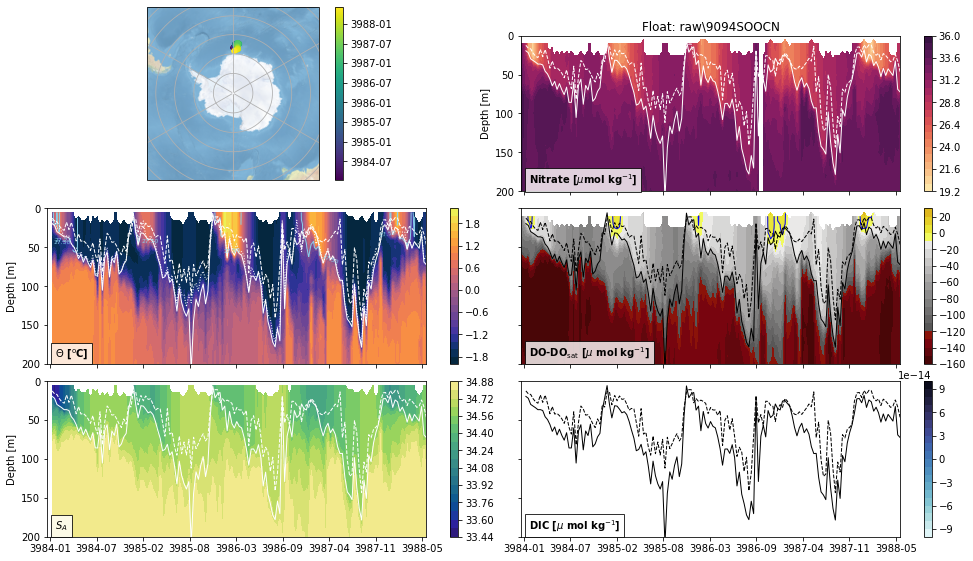

In [8]:
#with this command you can have an overview of the float data 

# to get ANDREX box plotted too
#import pandas as pd
#test=pd.read_csv('../../data/processed/ANDREXbox.csv',header=None).values
#box = ax0.plot([test[:,0]],[test[:,1]],transform = crs.PlateCarree(),color='green', marker=',', linestyle='dashed',linewidth=1.5, markersize=1.5,)

FLOAT.plots_map_main_variables(shows = True, saves = False, ylim=  (200,0))
#FLOAT.plots_mixing_layer_profile(20, show = True)

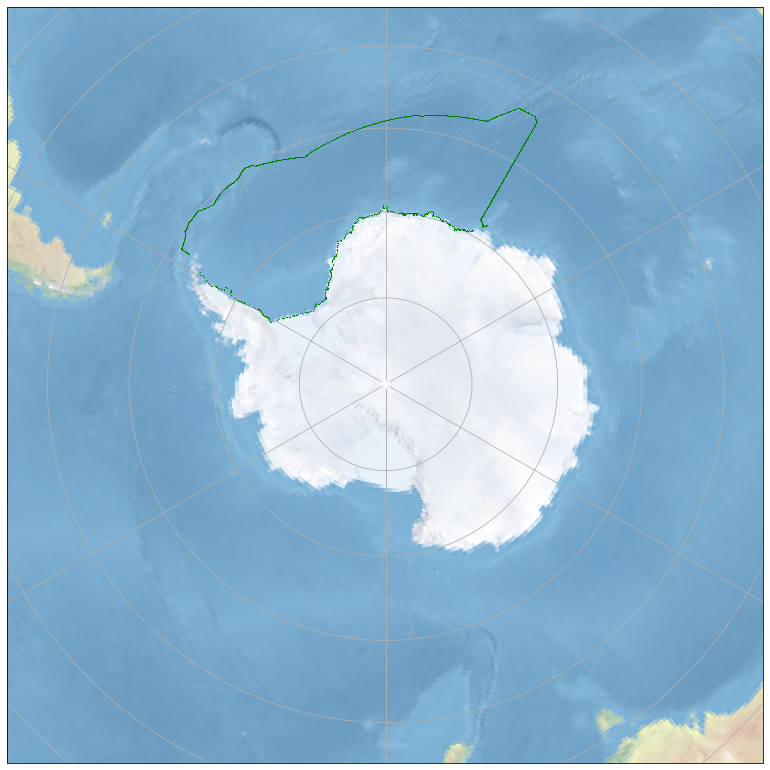

[-56.79229202 -56.78618164 -56.78007239 ... -59.62825    -59.127778
 -56.79229202]


In [9]:
# to get ANDREX box plotted too
import pandas as pd
test=pd.read_csv('../../data/processed/ANDREXbox.csv',header=None).values
#print(test)

fig = plt.figure(figsize = (25,15))
proj = crs.LambertAzimuthalEqualArea(central_latitude=-90.0)
ax0 = fig.add_axes([0.10,0.1,0.7,0.7], projection = proj)
ax0.gridlines(draw_labels=False)
ax0.set_extent([-180, 180, -90, -45], crs.PlateCarree()) # originally -25 as north extent, will shorten to -45
ax0.stock_img()

box = ax0.plot([test[:,0]],[test[:,1]],transform = crs.PlateCarree(),color='green', marker=',', linestyle='dashed',linewidth=1.5, markersize=1.5)
               
plt.show()

print(test[:,0])

## Nitrate uptake

In [8]:
#help()

Deepest mixed layer: 209 m
-125786228.51762265

--------------------------------
YEAR		 NEP	 <NEP>
		 [mol/m2/yr]
--------------------------------
2014-2015	 nan	 nan
2015-2016	 3.00	 2.73
2016-2017	 3.05	 2.21
2017-2018	 4.22	 3.13
2018-2019	 2.86	 1.85
2019-2020	 nan	 nan
--------------------------------


C:\Users\CLARAD~1\AppData\Local\Temp/ipykernel_3748/2178491059.py:20: RuntimeWarning: Mean of empty slice
  dint_Nitrate = np.nanmean(FLOAT.gr["Nitrate"][:jh,:], axis = 0)*(H-25)*(1027/1e6)


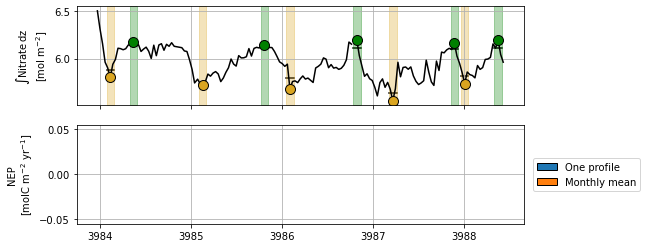

In [10]:
#first I convert the numerical date to a datetime format so I can get the month and year vectors
RCN = 106/16. # Redfield ratio

nt = FLOAT.gr["date"].size
dateDT = convert_time_to_date( FLOAT.gr["date"] )
year = np.full( nt, np.nan ) # make an array of nans, same size as nt (float dates) 
month = np.full(nt, np.nan) # make an array of nans, same size as nt (float dates) 
for i in range(nt):
    year[i] = dateDT[i].year # fill arrays with year
    month[i] = dateDT[i].year # fill arrays with... month? year?... check

H = np.nanmax(FLOAT.gr["mld"]) # calculates the maximum ML
##### YOU COULD OVER-RIDE IT BY UN-COMMENTING
# = 200
print("Deepest mixed layer: %1.0f m"%(H)) # think the % represents what value to put in so there's no breaks in the ""
jh = np.where( FLOAT.gr["depth"]>= H)[0][0] # gets the depth index for the maximum mixed layer
print(np.nanmean(FLOAT.gr["Lat"]))

#depth integrated nitrate
dint_Nitrate = np.nanmean(FLOAT.gr["Nitrate"][:jh,:], axis = 0)*(H-25)*(1027/1e6)
#by multiplying by density ~1027 and dividing by 1e6 I get units mol m-2

#for each year calculates the maximum and minimum
Uyear = np.unique(year)
nyr = Uyear.size
date_nit_min = np.full(nyr, np.nan)
date_nit_max = np.full(nyr, np.nan)
nit_max = np.full(nyr, np.nan)
nit_min = np.full(nyr, np.nan)
nit_max_month_avg = np.full(nyr, np.nan)
nit_min_month_avg = np.full(nyr, np.nan)
for i, yr in enumerate(Uyear):
    start_summer = datetime.datetime(int(yr),12,1,0,0).toordinal()
    end_summer = datetime.datetime(int(yr)+1,4,1,0,0).toordinal()
    it_summer = np.where( (FLOAT.gr["date"]>= start_summer) & (FLOAT.gr["date"]<= end_summer) )[0]
    if it_summer.size > 0:
        if np.sum(np.isfinite(dint_Nitrate[it_summer]))>0:
            imin_nit = it_summer[ np.nanargmin( dint_Nitrate[it_summer] ) ]
            date_nit_min[i] = FLOAT.gr["date"][imin_nit]  
            nit_min[i] =np.nanmin( dint_Nitrate[it_summer])
            ii_min_month = np.where( np.abs(FLOAT.gr["date"] - FLOAT.gr["date"][imin_nit]  )<15 )[0]
            nit_min_month_avg[i] =np.nanmean( dint_Nitrate[ii_min_month])
        
    start_winter = datetime.datetime(int(yr),5,1,0,0).toordinal()
    end_winter = datetime.datetime(int(yr),12,1,0,0).toordinal()
    it_winter = np.where( (FLOAT.gr["date"]>= start_winter) & (FLOAT.gr["date"]<= end_winter) )[0]
    if it_winter.size > 0:
        if np.sum(np.isfinite(dint_Nitrate[it_winter]))>0:
            imax_nit = it_winter[ np.nanargmax( dint_Nitrate[it_winter] ) ]
            date_nit_max[i] = FLOAT.gr["date"][imax_nit]  
            nit_max[i] = np.nanmax( dint_Nitrate[it_winter])
            ii_max_month = np.where( np.abs(FLOAT.gr["date"] - FLOAT.gr["date"][imax_nit]  )<15 )[0]
            nit_max_month_avg[i] =np.nanmean( dint_Nitrate[ii_max_month])

#calculates net ecosystem production (molC m-2 yr-1)
NEP = (nit_max - nit_min)*RCN
#from the monthly means
NEP_avg = (nit_max_month_avg - nit_min_month_avg)*RCN
#gets the date around the depletion
date_year = 0.5*(date_nit_min +date_nit_max )


#Plots the results 
fig, ax = plt.subplots(2,1,figsize = (8,4), sharex = True)
ax[0].plot( FLOAT.gr["date"], dint_Nitrate, "k" )
l1,=ax[0].plot(date_nit_min, nit_min,"o", ms = 10, mec = "k", color = "goldenrod")
l2,=ax[0].plot(date_nit_max, nit_max,"o", ms = 10, mec = "k", color = "green")
for i in range(nyr):
    ax[0].plot([date_nit_min[i]-15,date_nit_min[i]+15], [nit_min_month_avg[i],nit_min_month_avg[i]], color = "k", zorder = -1)
    ax[0].plot([date_nit_max[i]-15,date_nit_max[i]+15], [nit_max_month_avg[i],nit_max_month_avg[i]], zorder = -1, color = "k")
yl = ax[0].get_ylim()
for i in range(nyr):
    ax[0].fill_between( [date_nit_min[i]-15,date_nit_min[i]+15], y1 = yl[0], y2 = yl[1], color = l1.get_color(), alpha = 0.3 )
    ax[0].fill_between( [date_nit_max[i]-15,date_nit_max[i]+15], y1 = yl[0], y2 = yl[1], color = l2.get_color(), alpha = 0.3 )

ax[0].set_ylim(yl)
ax[0].set_ylabel( "$\\int \\mathrm{Nitrate}\, \\rm d z$\n[mol m$^{-2}$]" )
ax[0].grid(True)

ax[1].bar( date_year-20, NEP, width = 50, ec = "k", label = "One profile"  )
ax[1].bar( date_year+20, NEP_avg, width = 50, ec = "k", label = "Monthly mean" )
ax[1].set_ylabel("NEP\n[molC m$^{-2}$ yr$^{-1}$]")
ax[1].legend(loc = "center left", bbox_to_anchor = (1.01,0.5))
formatter = mdates.DateFormatter("%Y") ### formatter of the date
locator = mdates.YearLocator() ### where to put the labels
ax[1].xaxis.set_major_locator(locator)
ax[1].xaxis.set_major_formatter(formatter)
ax[1].grid(True)

print( "\n--------------------------------\nYEAR\t\t NEP\t <NEP>" )
print("\t\t [mol/m2/yr]")
print( "--------------------------------")
for i in range(nyr):
    print("%d-%d\t %1.2f\t %1.2f"%(Uyear[i],Uyear[i]+1, NEP[i], NEP_avg[i])  )
print( "--------------------------------")

As you see the averages are slightly different, not sure why, probably due to a combination of interpolation for gridding the nitrate and also the vertical integration, but the overall values and the general patterns are the same



matplotlib 2.2.5